In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

from keras.layers import Dense, BatchNormalization, Activation
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

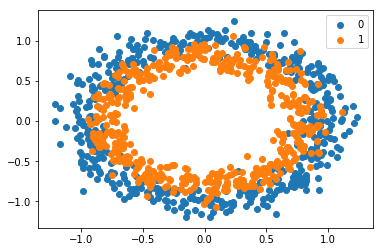

In [3]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
    samples_ix = np.where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
plt.legend()
plt.show()

In [4]:
# split into train and test
n_train = 500

trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## 1) MLP Without Batch Normalization

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 615us/step - loss: 0.7095 - acc: 0.5060 - val_loss: 0.6971 - val_acc: 0.4940
Epoch 2/100
500/500 [==============================] - 0s 120us/step - loss: 0.6915 - acc: 0.5040 - val_loss: 0.6916 - val_acc: 0.5140
Epoch 3/100
500/500 [==============================] - 0s 99us/step - loss: 0.6792 - acc: 0.5380 - val_loss: 0.6836 - val_acc: 0.5080
Epoch 4/100
500/500 [==============================] - 0s 105us/step - loss: 0.6775 - acc: 0.5280 - val_loss: 0.6778 - val_acc: 0.5360
Epoch 5/100
500/500 [==============================] - 0s 104us/step - loss: 0.6686 - acc: 0.5920 - val_loss: 0.6771 - val_acc: 0.5180
Epoch 6/100
500/500 [==============================] - 0s 125us/step - loss: 0.6661 - acc: 0.5620 - val_loss: 0.6684 - val_acc: 0.5520
Epoch 7/100
500/500 [==============================] - 0s 91us/step - loss: 0.6588 - acc: 0.5980 - val_loss: 0.6652 - val_acc: 0.5600
Epoch 8/100

In [8]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.820, Test: 0.838


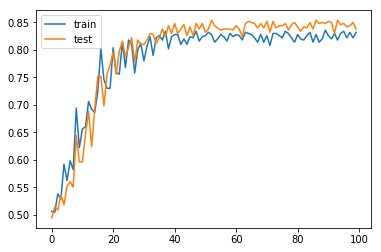

In [9]:
# plot training history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

## 2) MLP With Batch Normalization (before non-linearity)

In [10]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.7230 - acc: 0.5180 - val_loss: 0.7072 - val_acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 86us/step - loss: 0.7037 - acc: 0.4920 - val_loss: 0.6923 - val_acc: 0.5160
Epoch 3/100
500/500 [==============================] - 0s 89us/step - loss: 0.6830 - acc: 0.5440 - val_loss: 0.6940 - val_acc: 0.5080
Epoch 4/100
500/500 [==============================] - 0s 91us/step - loss: 0.6772 - acc: 0.5480 - val_loss: 0.6862 - val_acc: 0.5160
Epoch 5/100
500/500 [==============================] - 0s 86us/step - loss: 0.6745 - acc: 0.5740 - val_loss: 0.6717 - val_acc: 0.6060
Epoch 6/100
500/500 [==============================] - 0s 94us/step - loss: 0.6819 - acc: 0.5760 - val_loss: 0.6776 - val_acc: 0.5720
Epoch 7/100
500/500 [==============================] - 0s 88us/step - loss: 0.6689 - acc: 0.6160 - val_loss: 0.6622 - val_acc: 0.6720
Epoch 8/100
500/5

Epoch 61/100
500/500 [==============================] - 0s 103us/step - loss: 0.5516 - acc: 0.7340 - val_loss: 0.5117 - val_acc: 0.8360
Epoch 62/100
500/500 [==============================] - 0s 100us/step - loss: 0.5584 - acc: 0.7320 - val_loss: 0.5131 - val_acc: 0.8000
Epoch 63/100
500/500 [==============================] - 0s 110us/step - loss: 0.5379 - acc: 0.7440 - val_loss: 0.5032 - val_acc: 0.8220
Epoch 64/100
500/500 [==============================] - 0s 106us/step - loss: 0.5531 - acc: 0.7240 - val_loss: 0.5073 - val_acc: 0.8260
Epoch 65/100
500/500 [==============================] - 0s 91us/step - loss: 0.5795 - acc: 0.7000 - val_loss: 0.5037 - val_acc: 0.8240
Epoch 66/100
500/500 [==============================] - 0s 98us/step - loss: 0.5654 - acc: 0.7380 - val_loss: 0.5083 - val_acc: 0.8020
Epoch 67/100
500/500 [==============================] - 0s 93us/step - loss: 0.5534 - acc: 0.7260 - val_loss: 0.5009 - val_acc: 0.8320
Epoch 68/100
500/500 [=============================

In [13]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.828, Test: 0.840


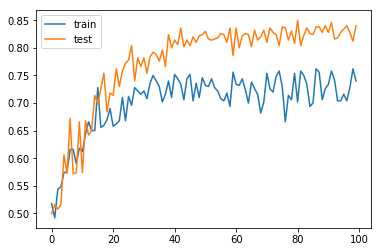

In [14]:
# plot training history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

## 3) MLP With Batch Normalization (after non-linearity)

In [15]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [16]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.8011 - acc: 0.4920 - val_loss: 0.6436 - val_acc: 0.6500
Epoch 2/100
500/500 [==============================] - 0s 89us/step - loss: 0.6219 - acc: 0.6500 - val_loss: 0.5541 - val_acc: 0.7880
Epoch 3/100
500/500 [==============================] - 0s 93us/step - loss: 0.5395 - acc: 0.7820 - val_loss: 0.5158 - val_acc: 0.7680
Epoch 4/100
500/500 [==============================] - 0s 91us/step - loss: 0.5036 - acc: 0.7780 - val_loss: 0.4789 - val_acc: 0.8020
Epoch 5/100
500/500 [==============================] - 0s 91us/step - loss: 0.4767 - acc: 0.7920 - val_loss: 0.4564 - val_acc: 0.8000
Epoch 6/100
500/500 [==============================] - 0s 93us/step - loss: 0.4719 - acc: 0.7960 - val_loss: 0.4416 - val_acc: 0.8060
Epoch 7/100
500/500 [==============================] - 0s 92us/step - loss: 0.4559 - acc: 0.8180 - val_loss: 0.4332 - val_acc: 0.8200
Epoch 8/100
500/5

In [18]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.848


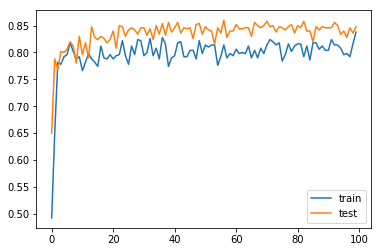

In [19]:
# plot training history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

## Personal Notes

Batch Normalization will:
1. Accelerate learning process
2. More effective after RELU activation function

Credits to: [machinelearningmastery.com](https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/)

---